##Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

El código ha sido tomado del siguiente enlace:
https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

Sin embargo, se ha realizado las respectivas adaptaciones para presentar lo que requiere el laboratorio.

In [31]:
import random
def create(n,women_list,man_list):
  man_list2 = women_list
  women_list2 = man_list
  dict_2 = {}
  dict_3 = {}
  dict_4 = {}
  dict_5 = {}
  dict_6 = {}
  dict_7 = {}
  c=[]
  count = 0


  for a in women_list:
    arreglo = []
    arr = []
    for i in range(1,n+1):
          arreglo.append(i)
          arr.append(i)
    random.shuffle(arreglo)
    dict_2.setdefault(a,arreglo)
  for a in range(n):
    b=[]
    c.append(b)

  for b in range(n):
    random.shuffle(arreglo)
    for a in range(n):
      c[a].append(arreglo[a])
  for i in range(len(women_list)):
    dict_3.setdefault(women_list[i],c[i])
  for i in dict_2:
    y = []
    for a in range(n):
      t = dict_2.setdefault(i)[a]
      y.append(man_list[t-1])
      dict_4.setdefault(i,y)
  for i in dict_3:
    y = []
    for a in range(n):
      t = dict_3.setdefault(i)[a]
      y.append(women_list[t-1])
    count = count + 1
    dict_5.setdefault(str(count),y)
  count = 0
  for b in dict_2:
      dict_6.setdefault(man_list[count],dict_2.setdefault(b)[::-1])  
      count = count +1
  count = 0
  for b in dict_3:
      dict_7.setdefault(man_list[count],dict_3.setdefault(b)[::-1])  
      count = count +1
  return dict_2,dict_3,dict_4,dict_5,arr,dict_6,dict_7


In [32]:

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from copy import copy
def clave_ordenacion(tupla):
  return (int(tupla[0]), tupla[1])
def clave_ordenacion2(tupla):
  return (tupla[0], tupla[1])



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


###n = 4

In [3]:

man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

dictionary = create(4,women_list,man_list)

In [4]:
women_df = pd.DataFrame(dictionary[0])
women_df.index = man_list
man_df = pd.DataFrame(dictionary[1])
man_df.index = man_list

In [33]:
def GaleShapley(man_list,women_list,women_df,man_df):
  women_available = {man:women_list for man in man_list}
  waiting_list = []
  proposals = {}
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man w*ho successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  return proposals, count

####Best case with n = 4

In [6]:
women_df2 = pd.DataFrame(dictionary[2])
women_df2.index = dictionary[4]


Below is the list of preference of each of the women

In [7]:
women_df2

,A,B,C,D
1,a,c,c,d
2,b,a,a,a
3,d,b,b,c
4,c,d,d,b


In [8]:
man_df2 = pd.DataFrame(dictionary[3])
man_df2.index = man_list


Below is the list of preference of each of the men


In [9]:
man_df2


,1,2,3,4
a,C,D,B,A
b,C,B,A,D
c,B,D,C,A
d,D,A,C,B


In [10]:
print("man woman")
result = GaleShapley(man_list,women_list,women_df,man_df)
b = []
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))


man woman
a     A
b     C
c     D
d     B


####Worst case with n = 4

Below is the list of preference of each of the women

In [11]:
women_df2

,A,B,C,D
1,a,c,c,d
2,b,a,a,a
3,d,b,b,c
4,c,d,d,b


Below is the list of preference of each of the women


In [12]:
man_df2

,1,2,3,4
a,C,D,B,A
b,C,B,A,D
c,B,D,C,A
d,D,A,C,B


In [13]:
man_list2 = women_list
women_list2 = man_list
women_df = pd.DataFrame(dictionary[5])
women_df.index = man_list2
man_df = pd.DataFrame(dictionary[6])
man_df.index = man_list2
result = GaleShapley(man_list2,women_list2,women_df,man_df)
b = []
print("woman man")
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))



woman man
A     b
B     d
C     c
D     a


### n =40

In [14]:

man_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39','40']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
dictionary = create(40,women_list,man_list)

In [15]:
women_df = pd.DataFrame(dictionary[0])
women_df.index = man_list
man_df = pd.DataFrame(dictionary[1])
man_df.index = man_list

####Best case with n = 40

In [16]:
women_df2 = pd.DataFrame(dictionary[2])
women_df2.index = dictionary[4]


Below is the list of preference of each of the women

In [17]:
women_df2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m
1,14,22,28,35,27,17,29,30,26,26,32,19,36,24,22,21,32,38,3,9,24,39,5,5,6,20,32,24,25,11,8,1,25,37,28,13,28,17,32,18
2,24,23,25,38,4,3,21,12,36,23,34,32,40,11,18,3,11,4,20,25,40,31,25,11,36,32,10,22,34,24,37,20,20,39,16,8,20,27,14,2
3,17,27,17,21,9,36,2,15,39,35,37,16,10,17,17,30,36,35,39,31,11,21,9,38,35,16,6,26,10,10,29,36,30,13,37,10,24,5,3,36
4,27,34,8,16,29,4,22,32,2,21,40,37,23,7,1,8,27,34,12,19,35,18,35,33,24,30,7,30,16,27,12,6,39,3,30,21,9,12,22,20
5,32,8,9,5,8,6,14,1,15,18,38,1,3,3,33,6,21,10,13,22,21,20,4,18,40,6,16,9,5,31,36,39,11,1,7,37,33,19,17,24
6,15,28,32,4,33,24,24,16,21,6,27,4,9,9,28,28,17,37,36,1,32,37,2,14,32,3,21,32,30,16,13,4,14,32,2,27,39,26,28,7
7,28,16,6,36,10,32,20,23,22,14,18,7,7,21,30,22,30,18,17,8,31,38,30,29,3,5,1,28,14,32,17,19,13,38,25,24,5,22,4,26
8,33,30,22,28,34,21,25,10,16,27,1,24,8,5,16,14,25,27,8,16,30,26,29,26,21,10,39,2,24,36,7,24,2,24,3,33,15,1,9,28
9,39,20,18,39,22,16,26,11,17,15,33,31,21,19,36,36,7,28,25,20,34,40,11,17,22,15,26,33,26,21,14,27,33,30,29,16,37,13,13,12
10,26,32,23,34,5,33,28,2,32,5,19,5,39,25,40,27,40,39,30,27,28,10,7,22,8,17,3,23,7,19,31,9,28,9,19,2,23,33,2,4


In [18]:
man_df2 = pd.DataFrame(dictionary[3])
man_df2.index = man_list


Below is the list of preference of each of the women


In [19]:
man_df2


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
1,A,G,S,g,L,m,W,h,k,C,F,M,d,P,l,N,a,T,R,X,K,f,I,J,e,b,U,Ñ,D,c,B,Z,O,i,Y,E,V,j,H,Q
2,X,i,m,J,V,a,D,Y,T,e,L,k,Ñ,b,U,R,Z,Q,E,M,C,I,P,K,W,d,g,H,F,c,h,j,B,N,S,G,f,A,O,l
3,j,m,K,C,W,l,R,b,Z,U,k,E,d,D,G,M,T,B,F,h,Ñ,A,V,g,f,Y,O,e,c,i,P,J,S,L,N,X,a,I,H,Q
4,Q,J,X,A,l,P,c,V,M,j,Ñ,f,N,g,E,L,b,h,U,k,S,a,Z,K,T,W,B,I,H,R,m,O,F,e,G,C,d,Y,i,D
5,S,m,C,K,A,M,h,I,l,G,L,a,j,H,f,Ñ,X,i,g,F,R,d,J,W,U,Q,c,b,B,P,Y,E,N,D,k,T,e,Z,V,O
6,W,J,N,P,e,I,R,l,A,m,c,L,C,S,Z,i,K,V,M,b,d,B,a,h,F,X,T,E,Ñ,j,k,H,D,f,O,Q,g,G,U,Y
7,B,L,K,g,j,G,f,i,N,A,U,O,I,a,W,b,e,Y,S,P,J,D,l,h,C,X,T,R,d,Q,F,E,Ñ,M,k,H,V,c,Z,m
8,X,G,C,A,P,j,M,K,Ñ,I,a,L,Y,c,T,b,m,g,V,D,U,B,i,f,k,Z,l,W,S,N,O,H,F,e,d,h,J,E,R,Q
9,M,C,N,V,c,i,X,K,H,b,Z,W,g,Q,l,h,j,G,U,k,d,A,Y,P,I,f,F,R,e,B,L,T,m,O,S,Ñ,E,D,a,J
10,k,F,i,W,S,M,Z,N,e,I,Y,E,b,B,V,P,c,O,f,A,C,m,U,R,l,j,T,a,J,K,Q,d,Ñ,h,D,G,L,g,X,H


In [20]:
print("man woman")
result = GaleShapley(man_list,women_list,women_df,man_df)
b = []
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))


man woman
1     V
2     i
3     l
4     Z
5     g
6     M
7     J
8     S
9     j
10     L
11     c
12     f
13     N
14     a
15     Q
16     F
17     G
18     b
19     h
20     d
21     D
22     H
23     I
24     A
25     C
26     U
27     m
28     E
29     Y
30     K
31     X
32     Ñ
33     O
34     B
35     W
36     P
37     T
38     e
39     R
40     k


####Worst case with n = 40

Below is the list of preference of each of the women


In [21]:
women_df2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Ñ,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m
1,14,22,28,35,27,17,29,30,26,26,32,19,36,24,22,21,32,38,3,9,24,39,5,5,6,20,32,24,25,11,8,1,25,37,28,13,28,17,32,18
2,24,23,25,38,4,3,21,12,36,23,34,32,40,11,18,3,11,4,20,25,40,31,25,11,36,32,10,22,34,24,37,20,20,39,16,8,20,27,14,2
3,17,27,17,21,9,36,2,15,39,35,37,16,10,17,17,30,36,35,39,31,11,21,9,38,35,16,6,26,10,10,29,36,30,13,37,10,24,5,3,36
4,27,34,8,16,29,4,22,32,2,21,40,37,23,7,1,8,27,34,12,19,35,18,35,33,24,30,7,30,16,27,12,6,39,3,30,21,9,12,22,20
5,32,8,9,5,8,6,14,1,15,18,38,1,3,3,33,6,21,10,13,22,21,20,4,18,40,6,16,9,5,31,36,39,11,1,7,37,33,19,17,24
6,15,28,32,4,33,24,24,16,21,6,27,4,9,9,28,28,17,37,36,1,32,37,2,14,32,3,21,32,30,16,13,4,14,32,2,27,39,26,28,7
7,28,16,6,36,10,32,20,23,22,14,18,7,7,21,30,22,30,18,17,8,31,38,30,29,3,5,1,28,14,32,17,19,13,38,25,24,5,22,4,26
8,33,30,22,28,34,21,25,10,16,27,1,24,8,5,16,14,25,27,8,16,30,26,29,26,21,10,39,2,24,36,7,24,2,24,3,33,15,1,9,28
9,39,20,18,39,22,16,26,11,17,15,33,31,21,19,36,36,7,28,25,20,34,40,11,17,22,15,26,33,26,21,14,27,33,30,29,16,37,13,13,12
10,26,32,23,34,5,33,28,2,32,5,19,5,39,25,40,27,40,39,30,27,28,10,7,22,8,17,3,23,7,19,31,9,28,9,19,2,23,33,2,4


Below is the list of preference of each of the men


In [22]:
man_df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
1,A,G,S,g,L,m,W,h,k,C,F,M,d,P,l,N,a,T,R,X,K,f,I,J,e,b,U,Ñ,D,c,B,Z,O,i,Y,E,V,j,H,Q
2,X,i,m,J,V,a,D,Y,T,e,L,k,Ñ,b,U,R,Z,Q,E,M,C,I,P,K,W,d,g,H,F,c,h,j,B,N,S,G,f,A,O,l
3,j,m,K,C,W,l,R,b,Z,U,k,E,d,D,G,M,T,B,F,h,Ñ,A,V,g,f,Y,O,e,c,i,P,J,S,L,N,X,a,I,H,Q
4,Q,J,X,A,l,P,c,V,M,j,Ñ,f,N,g,E,L,b,h,U,k,S,a,Z,K,T,W,B,I,H,R,m,O,F,e,G,C,d,Y,i,D
5,S,m,C,K,A,M,h,I,l,G,L,a,j,H,f,Ñ,X,i,g,F,R,d,J,W,U,Q,c,b,B,P,Y,E,N,D,k,T,e,Z,V,O
6,W,J,N,P,e,I,R,l,A,m,c,L,C,S,Z,i,K,V,M,b,d,B,a,h,F,X,T,E,Ñ,j,k,H,D,f,O,Q,g,G,U,Y
7,B,L,K,g,j,G,f,i,N,A,U,O,I,a,W,b,e,Y,S,P,J,D,l,h,C,X,T,R,d,Q,F,E,Ñ,M,k,H,V,c,Z,m
8,X,G,C,A,P,j,M,K,Ñ,I,a,L,Y,c,T,b,m,g,V,D,U,B,i,f,k,Z,l,W,S,N,O,H,F,e,d,h,J,E,R,Q
9,M,C,N,V,c,i,X,K,H,b,Z,W,g,Q,l,h,j,G,U,k,d,A,Y,P,I,f,F,R,e,B,L,T,m,O,S,Ñ,E,D,a,J
10,k,F,i,W,S,M,Z,N,e,I,Y,E,b,B,V,P,c,O,f,A,C,m,U,R,l,j,T,a,J,K,Q,d,Ñ,h,D,G,L,g,X,H


In [23]:
man_list2 = women_list
women_list2 = man_list
women_df = pd.DataFrame(dictionary[5])
women_df.index = man_list2
man_df = pd.DataFrame(dictionary[6])
man_df.index = man_list2
result = GaleShapley(man_list2,women_list2,women_df,man_df)
b = []
print("woman man")
for a in result[0]:
  b.append(a)
c = sorted(b, key=clave_ordenacion2)
for v in c:
  print(str(v[0]) + "     " + str(v[1]))



woman man
A     38
B     19
C     32
D     21
E     17
F     24
G     2
H     16
I     15
J     25
K     11
L     26
M     5
N     40
O     3
P     1
Q     9
R     8
S     4
T     31
U     35
V     29
W     7
X     6
Y     18
Z     28
a     14
b     33
c     30
d     12
e     37
f     20
g     10
h     13
i     34
j     27
k     39
l     36
m     23
Ñ     22


###Irving algorithm

In [24]:

import copy
import random
def getKey(lista, llave):
    for key, val in lista.items():
        if val == llave:
            return key
    return 0

def ciclo(tabla):
    tablaI = tabla[0]
    tablaD = tabla[1]
    if len(tablaI) > len(set(tablaI)):
        return True
    else:
        return False

def noEstable(prefer):
    for i in prefer:
        if len(prefer[i]) == 0:
            return True
    return False

def esEstable(prefer):
  for i in prefer:
    if len(prefer[i]) != 1:
      return False
  return True

def quitarCiclo(prefer, tabla):
  npreferences = prefer
  for i in range(len(tabla[0])-1):
    npreferences[tabla[1][i]].remove(tabla[0][i+1])
    npreferences[tabla[0][i+1]].remove(tabla[1][i])
  return npreferences

def paso1(prefer):
  espera = []
  propuestas={}
  npropuestas={}
  pasos=0
  for i in prefer:
    espera.append(i)
    propuestas[i] = None
    npropuestas[i] = 0
  npreferences = copy.deepcopy(prefer)
  while not len(espera)==0:
    i=espera[0]
    npropuestas[i]+=1
    pasos+=1
    if npropuestas[i]> len(propuestas):
      print("No existe parejas estables.")
      return (False,False)
    for j in prefer[i]:
      if propuestas[j]==None:
        del espera[0]
        propuestas[j]=i
        break
      elif propuestas[j] != i:
        actual = prefer[j].index(i)
        otro = prefer[j].index(propuestas[j])
        if actual < otro:
          del espera[0]
          espera.insert(0, propuestas[j])
          npreferences[propuestas[j]].remove(j)
          npreferences[j].remove(propuestas[j])
          propuestas[j] = i
          break
        else:
          npreferences[i].remove(j)
          npreferences[j].remove(i)
    prefer = copy.deepcopy(npreferences)
  return (propuestas,prefer,pasos)

def paso2(propuestas,prefer,pasos):
  npreferences=copy.deepcopy(prefer)
  for k in prefer:
    indexpropuestas=npreferences[k].index(propuestas[k])
    npreferences[k]= npreferences[k][:indexpropuestas+1]
    #pasos+=1
    for j in prefer:
      key= getKey(propuestas,k)
      if j != k and j != propuestas[k] and j != key:
        try:
          npreferences[j].remove(k)
        except ValueError:
          pass
  return (npreferences,pasos)


def paso3(prefer,pasos):
  si=True
  while True:
    tabla=([],[])
    if noEstable(prefer):
      print("No existe parejas estables.")
      return False
    for i in prefer:
      if len(prefer[i]) >= 2 and si == True:
        match1 = i
        tabla[0].append(match1)
        match2 = prefer[i][1]
        tabla[1].append(match2)
        si=False
        pasos+=1
      elif si==False:
        if (ciclo(tabla)):
          prefer=quitarCiclo(prefer,tabla)
          si = True
          pasos+=1
          break
        match1 = prefer[match2][-1]
        tabla[0].append(match1)
        match2 = prefer[match1][1]
        tabla[1].append(match2)
        pasos+=1
    if esEstable(prefer):
      return (prefer,pasos)

  return False
def irving(prefer):
  a=paso1(prefer)
  propuestas=a[0]
  if propuestas==False:
    return False
  prefer1=a[1]
  pasos=a[2]
  prefer2=paso2(propuestas,prefer1,pasos)[0]
  pasos=paso2(propuestas,prefer1,pasos)[1]
  if prefer2==False:
    return False
  prefer3=paso3(prefer2,pasos)
  matches=prefer3[0]
  pasos=prefer3[1]
  for i in matches:
    a=i
    for j in matches[i]:
      print(a," - ", j)

### n = **4**

####Best Case

In [25]:
def best(n):
  prefer={}
  for k in range(n):
      list=[]
      list.append(n-k-1)
      while not len(list)==n-1:
        r=random.randint(0,n-1)
        if r not in list and r!=k:
          list.append(r)
      prefer[k]=list
  return prefer
irving(best(4))

0  -  3
1  -  2
2  -  1
3  -  0


#### Worst Case

In [26]:
def worst(n):
  prefer={}
  for k in range(n):
      ni=n
      list=[]
      for i in range(k+1,n):
        list.append(i)
      for j in range (k):
        list.append(j)
      prefer[k]=list
  return prefer
irving(worst(4))

0  -  3
1  -  2
2  -  1
3  -  0


###n = 40

####Best Case

In [27]:
irving(worst(40))

0  -  39
1  -  2
2  -  1
3  -  4
4  -  3
5  -  6
6  -  5
7  -  8
8  -  7
9  -  10
10  -  9
11  -  12
12  -  11
13  -  14
14  -  13
15  -  16
16  -  15
17  -  18
18  -  17
19  -  20
20  -  19
21  -  22
22  -  21
23  -  24
24  -  23
25  -  26
26  -  25
27  -  28
28  -  27
29  -  30
30  -  29
31  -  32
32  -  31
33  -  34
34  -  33
35  -  36
36  -  35
37  -  38
38  -  37
39  -  0


####Worst Case

In [28]:
irving(best(40))

0  -  39
1  -  38
2  -  37
3  -  36
4  -  35
5  -  34
6  -  33
7  -  32
8  -  31
9  -  30
10  -  29
11  -  28
12  -  27
13  -  26
14  -  25
15  -  24
16  -  23
17  -  22
18  -  21
19  -  20
20  -  19
21  -  18
22  -  17
23  -  16
24  -  15
25  -  14
26  -  13
27  -  12
28  -  11
29  -  10
30  -  9
31  -  8
32  -  7
33  -  6
34  -  5
35  -  4
36  -  3
37  -  2
38  -  1
39  -  0


###Random Preference List

##Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.


###n = 4

In [34]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
total = []
for i in range(100):
  result = []
  dictionary = create(4,women_list,man_list)
  women_df = pd.DataFrame(dictionary[0])
  women_df.index = man_list
  man_df = pd.DataFrame(dictionary[1])
  man_df.index = man_list
  result = GaleShapley(man_list,women_list,women_df,man_df)
  total.append(result[1])
promedio2 = sum(total) / float(len(total))
print("Promedio:  " + str(promedio2))
print("Mínimo:  " + str(min(total)))
print("Máximo:  " + str(max(total)))


Promedio:  3.33
Mínimo:  1
Máximo:  7


###n = 40

In [35]:

man_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39','40']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
total2 = []
for i in range(100):
  dictionary = create(40,women_list,man_list)
  women_df = pd.DataFrame(dictionary[0])
  women_df.index = man_list
  man_df = pd.DataFrame(dictionary[1])
  man_df.index = man_list
  result = GaleShapley(man_list,women_list,women_df,man_df)
  total2.append(result[1])
promedio = sum(total2) / float(len(total2))
print("Promedio:  " + str(promedio))
print("Mínimo:  " + str(min(total2)))
print("Máximo:  " + str(max(total2)))


Promedio:  57.88
Mínimo:  12
Máximo:  159


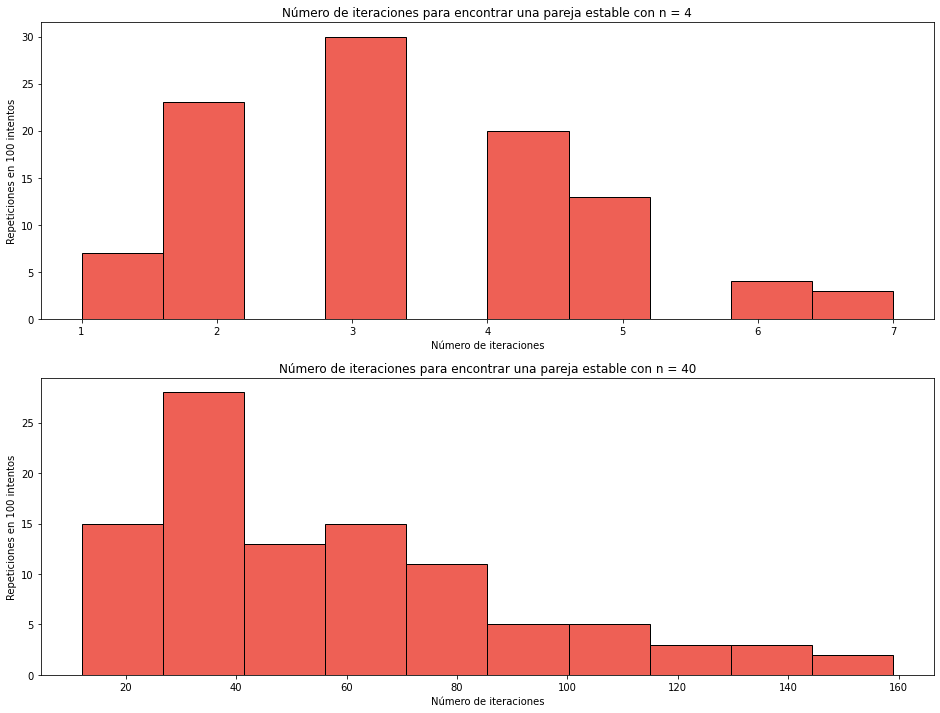

In [36]:

 
fig, axs = plt.subplots(2, 1, figsize=(16, 12))
axs[0].set(title = "Número de iteraciones para encontrar una pareja estable con n = 4")
axs[0].hist(total, edgecolor = 'black',color='#EE6055',  linewidth=1)
axs[0].set(xlabel = "Número de iteraciones")
axs[0].set(ylabel = "Repeticiones en 100 intentos")
 
axs[1].set(title = "Número de iteraciones para encontrar una pareja estable con n = 40")
axs[1].hist(total2, edgecolor = 'black',color='#EE6055',  linewidth=1)
axs[1].set(xlabel = "Número de iteraciones")
axs[1].set(ylabel = "Repeticiones en 100 intentos")
 
plt.show()